# ДОМАШНЯЯ РАБОТА - АНАЛИЗ ВРЕМЕННЫХ РЯДОВ 

Данильченко Вадим

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [4]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [10]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# проведем анализ первого временного ряда и сделаем его стационарным

In [15]:
series1=pd.read_csv('data/weekly-closings-of-the-dowjones-.csv').iloc[:,-1]
series1.head()

0    890.19
1    901.80
2    888.51
3    887.78
4    858.43
Name: Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


D:\Program Files\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


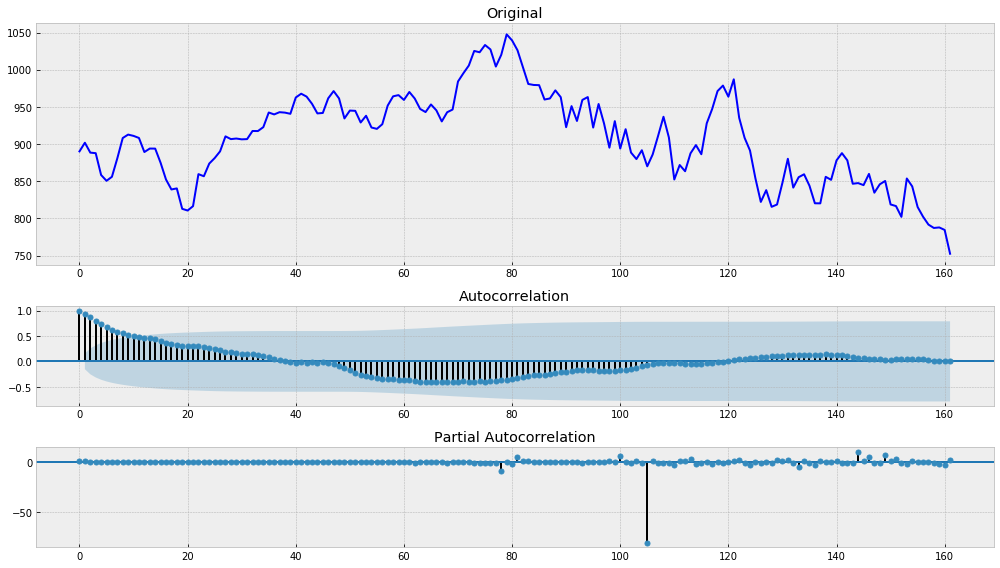

In [16]:
tsplot(series1)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда:
+ значение тестовой статистики выше критических значений
+ p-значение выше 0.05

Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [17]:
series = boxcox(series1, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


D:\Program Files\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


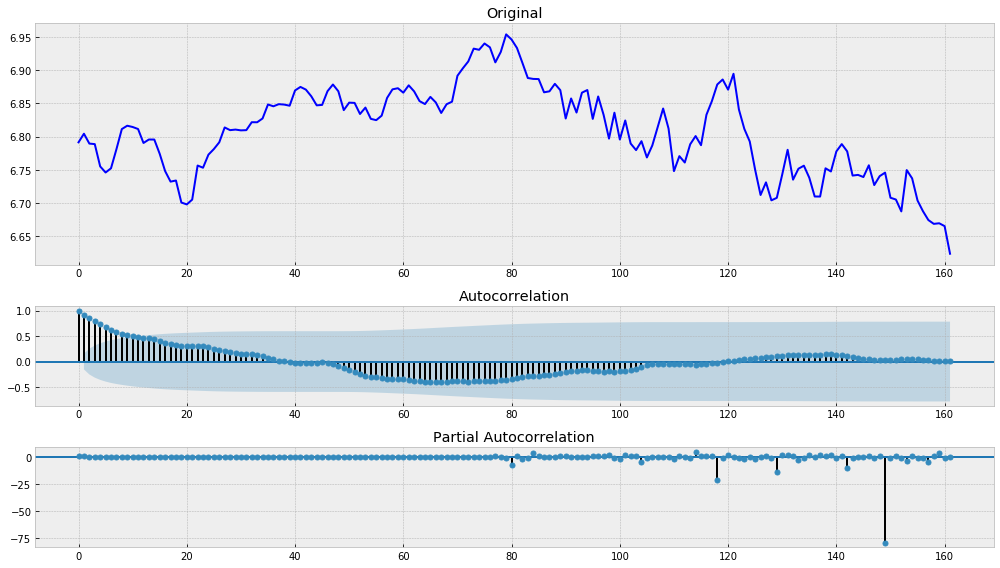

In [18]:
tsplot(series)

не вижу особых изменений в корректировке размаха дисперсии, P-значение вообще стало выше. Попробуем убрать тренд дифференцированием.

In [19]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


D:\Program Files\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


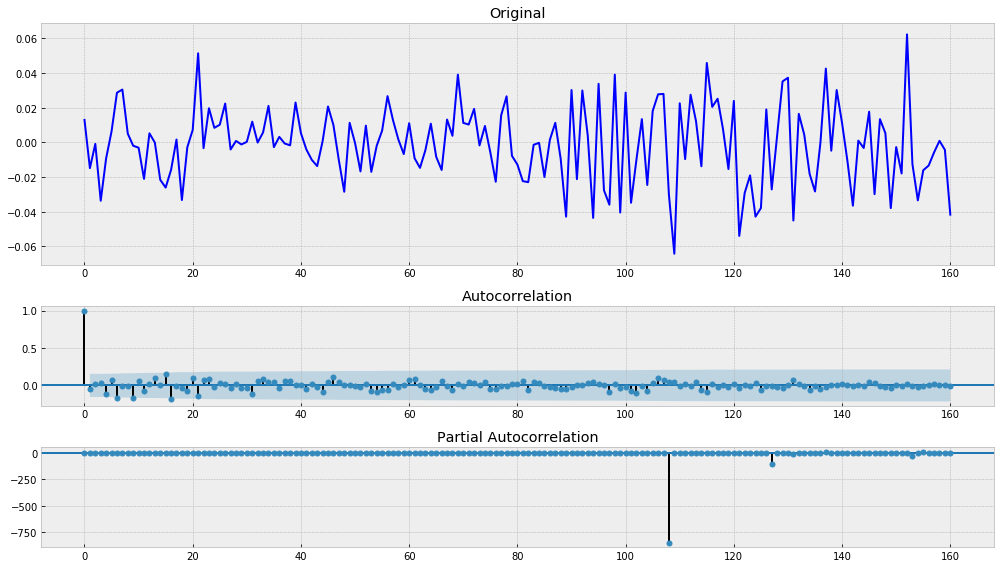

In [20]:
tsplot(series)

Сразу стало лучше, p-значение стало близким к 0, значение тестовой статистики выше критических, сезонности не наблюдается

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

# проанализируем второй временной ряд

In [27]:
series2=pd.read_csv('data/monthly-us-auto-registration-tho.csv', sep=';').iloc[:,-1]
series2.head()

0    209
1    214
2    265
3    290
4    287
Name: Monthly U.S. auto registration (thousands) 1947 ? 1968, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


D:\Program Files\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


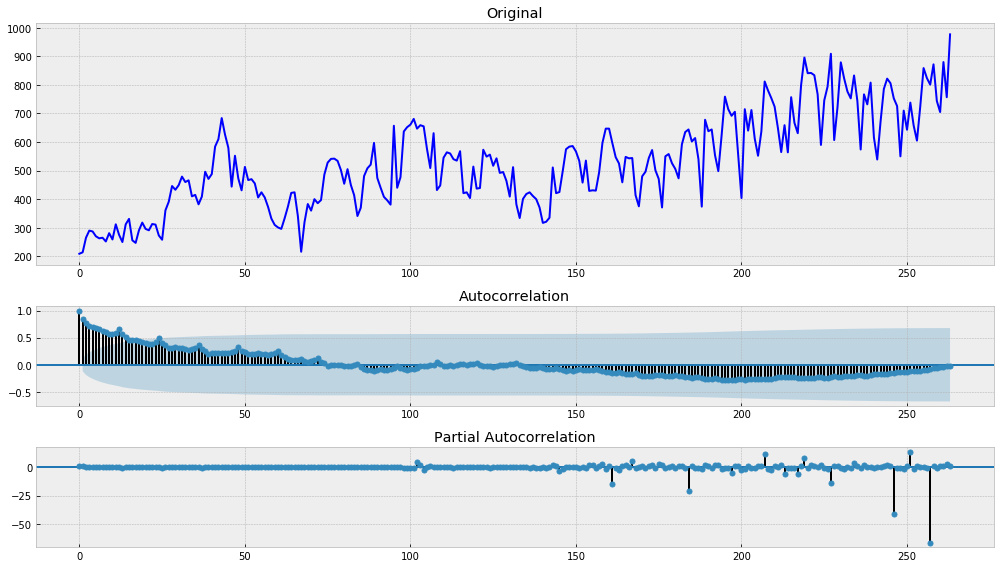

In [28]:
tsplot(series2)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда:
+ значение тестовой статистики выше критических значений
+ p-значение выше 0.05

к тому же мы можем наблюдать наличие как тренда, так и сезонности 

Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [29]:
series = boxcox(series2, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.941628
p-value                          0.312738
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


D:\Program Files\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


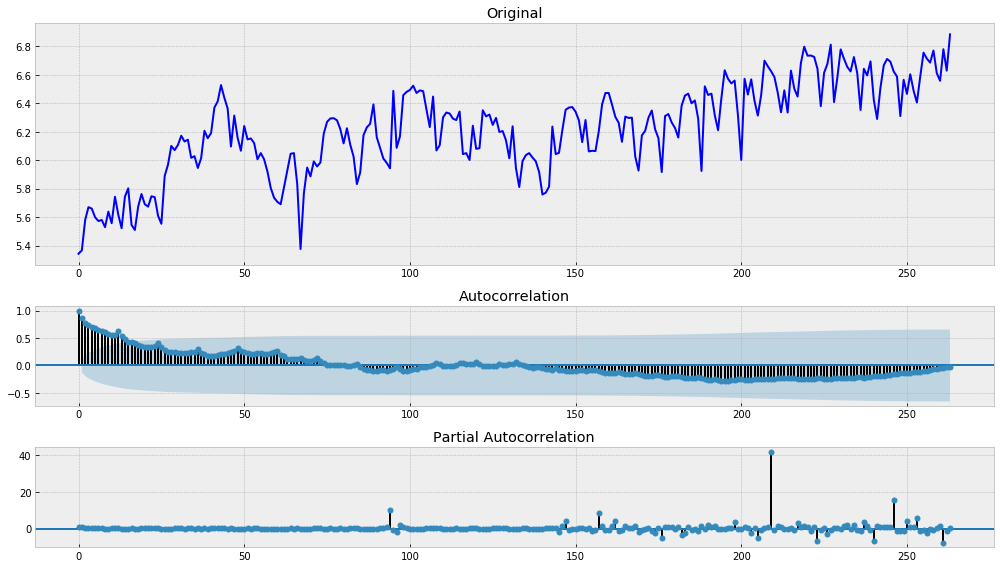

In [30]:
tsplot(series)

Не скажу, что нам удалось убрать размах дисперсии, хоть мы и уменьшили p-value. Тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [31]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -4.362471
p-value                          0.000346
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


D:\Program Files\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


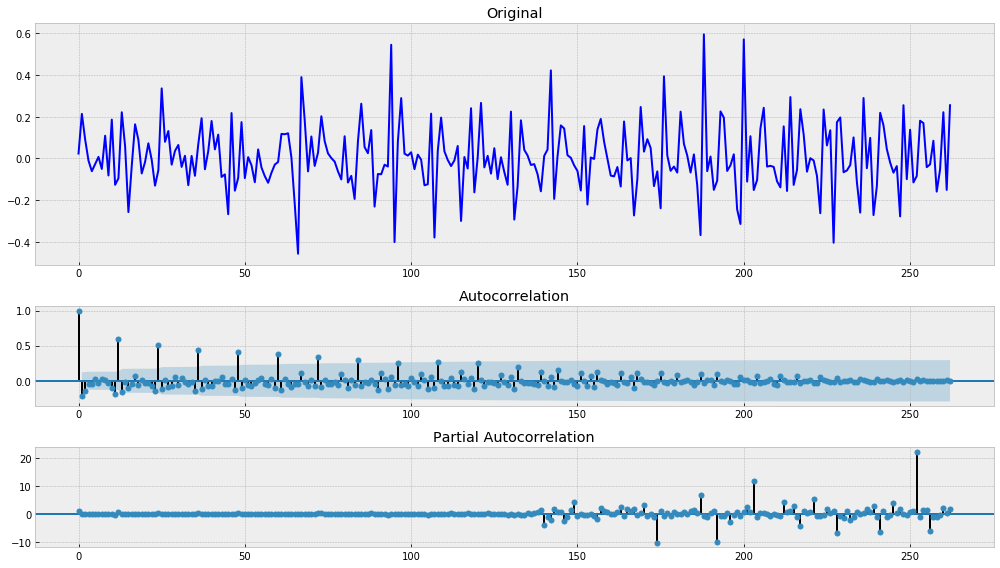

In [32]:
tsplot(series)

p-value стало близко к нулю, по тесту Дикки-Фуллера тоже можно сделать вывод о стационарности ряда, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

найдем периодичность сезонности

In [39]:
autocorr=[]
for i in range(36):
    autocorr.append(pd.Series(series).autocorr(i))
print('периодичность пиков:', np.array(autocorr).argsort()[-3:][::-1])

периодичность пиков: [ 0 12 24]


можем сказать, что сезонность равна 12 месяцам

In [40]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.528275e+00
p-value                        1.001817e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


D:\Program Files\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


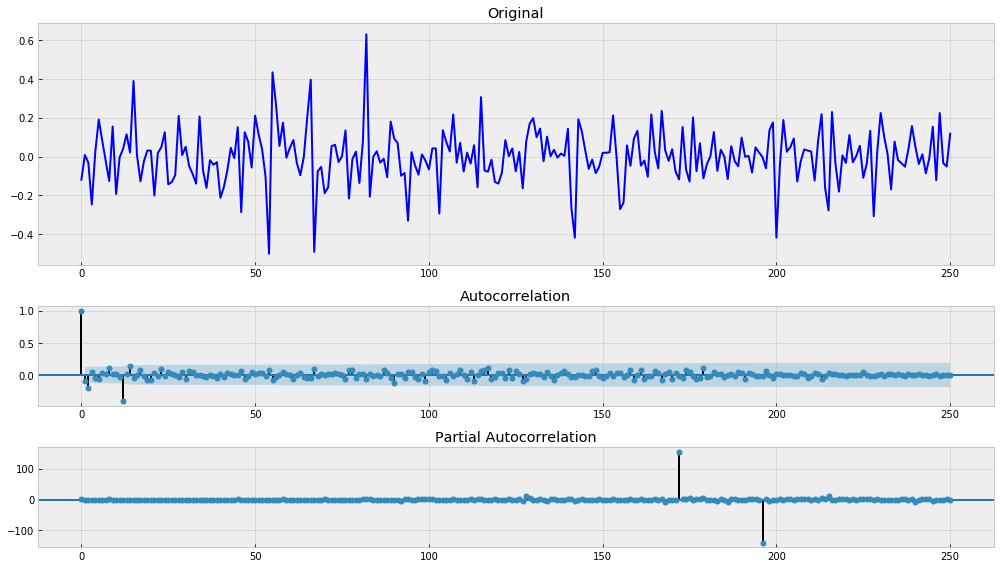

In [42]:
tsplot(series)

График автокорреляции резко убывает, p-значение стало еще меньше - отвергаем гипотезу о нестационарности ряда!